In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

# Exploring categories

In [5]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

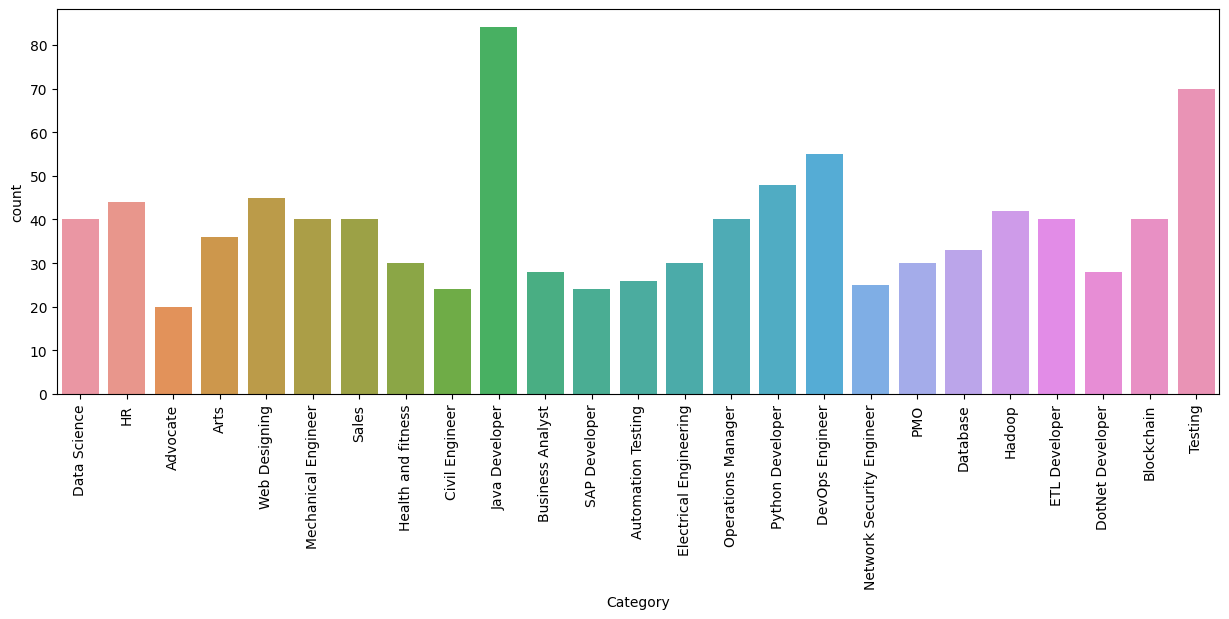

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Category',data=df)
plt.xticks(rotation =90)
plt.show()

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x185f5706500>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

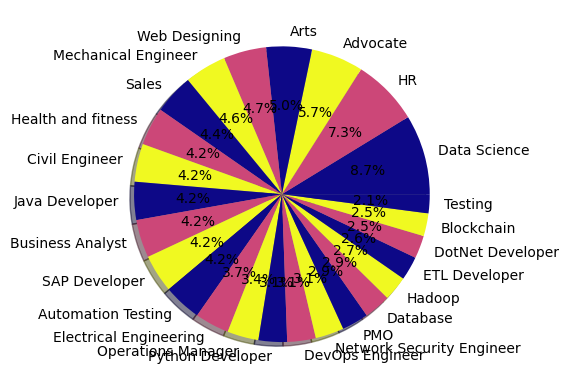

In [9]:
counts =df['Category'].value_counts()
labels =df['Category'].unique()

plt.pie(counts,labels=labels,autopct= '%1.1f%%',shadow =True ,colors= plt.cm.plasma(np.linspace(0,1,3)))

# Explorig Resume


In [10]:
df['Category'][0]

'Data Science'

In [11]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning data :
1.URls,
2.Hastags,
3.Mentions,
4.Special letters,
5.Puntuations.


In [13]:
import re # regular fuction re. the bwlows fuction is use for remove all those cacharter from sentence
def cleanResume(txt):
    cleanTxt = re.sub('http\S+\s','',txt)
    cleanTxt = re.sub('@\S+','',cleanTxt)
    cleanTxt = re.sub('#\S+','',cleanTxt)
    cleanTxt = re.sub('RT|cc',' ',cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*â¢+,-./:;<->\\?@[\]^_`{|}`"""),'',cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
    cleanTxt = re.sub('#=\s+',' ',cleanTxt)
    
    return cleanTxt

In [14]:
df['Resume'] = df['Resume'].str.replace(r'[\r\n\s]', ' ', regex=True)

In [15]:
cleanResume("my ### % & $ website like is this http://helloword and access it @gmail.com")

'my     website like is this and a ess it '

In [16]:
df['Resume']= df['Resume'].apply(lambda x :cleanResume(x))

In [17]:
df['Resume']

0      Skills  Programming Languages Python pandas nu...
1      Education Details   May 2013 to May 2017 BE   ...
2      Areas of Interest Deep Learning Control System...
3      Skills   R   Python   SAP HANA   Tableau   SAP...
4      Education Details    MCA   YMCAUST  Faridabad ...
                             ...                        
957    Computer Skills   Proficient in MS office Word...
958       Willingness to a ept the challenges    Posi...
959    PERSONAL SKILLS   Quick learner   Eagerness to...
960    COMPUTER SKILLS  SOFTWARE KNOWLEDGE MSPower Po...
961    Skill Set OS Windows XP788110 Database MYSQL s...
Name: Resume, Length: 962, dtype: object

In [18]:
df['Resume'][0]

'Skills  Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery  Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA  Neural Nets  Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau  Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision  Open CV and understanding of Deep learningEducation Details     Data Science Assurance Associate     Data Science Assurance Associate  Ernst  Young LLP  Skill Details   JAVASCRIPT Exprience  24 months  jQuery Exprience  24 months  Python Exprience  24 monthsCompany Details   company  Ernst  Young LLP  description  Fraud Investigations and Dispute Services   Assurance  TECHNOLOGY ASSISTED REVIEW  TAR Technology Assisted Revi

# Words into categorycal values

In [19]:
df # superviced becuse in this there are a input feature & output feature :skill basis e bole kon category tai and multilabel classification

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas nu...
1,Data Science,Education Details May 2013 to May 2017 BE ...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP...
4,Data Science,Education Details MCA YMCAUST Faridabad ...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word...
958,Testing,Willingness to a ept the challenges Posi...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Po...


In [20]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [22]:
le.fit(df['Category']) # train krsi category dya
df['Category']=le.transform(df['Category'])


In [23]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas nu...
1,6,Education Details May 2013 to May 2017 BE ...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP...
4,6,Education Details MCA YMCAUST Faridabad ...
...,...,...
957,23,Computer Skills Proficient in MS office Word...
958,23,Willingness to a ept the challenges Posi...
959,23,PERSONAL SKILLS Quick learner Eagerness to...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Po...


In [24]:
print(df['Category'])

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32


In [25]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vactorization 

In [26]:
df['Resume'][0]

'Skills  Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery  Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA  Neural Nets  Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau  Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision  Open CV and understanding of Deep learningEducation Details     Data Science Assurance Associate     Data Science Assurance Associate  Ernst  Young LLP  Skill Details   JAVASCRIPT Exprience  24 months  jQuery Exprience  24 months  Python Exprience  24 monthsCompany Details   company  Ernst  Young LLP  description  Fraud Investigations and Dispute Services   Assurance  TECHNOLOGY ASSISTED REVIEW  TAR Technology Assisted Revi

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredText =tfidf.transform(df['Resume'])

In [28]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas nu...
1,6,Education Details May 2013 to May 2017 BE ...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP...
4,6,Education Details MCA YMCAUST Faridabad ...
...,...,...
957,23,Computer Skills Proficient in MS office Word...
958,23,Willingness to a ept the challenges Posi...
959,23,PERSONAL SKILLS Quick learner Eagerness to...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Po...


In [29]:
requredText #input k bole feature r output k bole label

<962x7891 sparse matrix of type '<class 'numpy.float64'>'
	with 164494 stored elements in Compressed Sparse Row format>

# Splitting 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(requredText,df['Category'], test_size=0.2,random_state=42)

In [32]:
X_train.shape

(769, 7891)

In [33]:
X_test.shape

(193, 7891)

# Train the model And print the classification report

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred= clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


# Prediction System 

In [36]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl','wb'))

In [37]:
myResume ="""I am a data scientist specializing in machine learning,deep learning and computer vision with a stong background in mathmatics, statistics,and programming, I am passionate about uncovering hidden patterns and insights in data.
I have extensive experience in developing predictive models, implementing deep learning algorithms,and designing computer vision system. My technical skill include proficiency in python, sklearn, TensorFlow, and pythorch.
What sets me apart is my ability to effectively comminicate cplex concepts to diverse audiences.
I excel in trenslating technical insights into actionable recommendations that drive informed decision making.
If you're looking for a dedicated and versatile data scientist to collaborate on impactful project,I am eager to contribute my expretise. Let's harness the power of data together to unlock new possibilities and
shape a better future.
Contact & Sources
Email:raya83491@gamil.com
Phone:01740825242
Github:https://github.com/jarinraya02
Linkedln:https://www.linkedin.com/in/jarin-tasnim-raya-5373521b3/
ABOUT ME 
Work experience 
Skills
Jarin Tasnim Raya
Language
English 
Bangla
I am a versatile data scientist with expetise in a wide
range of projecrs ,including machine learning ,recommendation syste, deep 
learning, and computer vision.Throughout my career, I have successfully developed
and deployed various machine learning models to solve complex problems and drive data 
driven decision making.
Machine Learning 
Deep Learning
computer Vision 
Recommendation systems
Data visualization
Progamming languages (Python,SQL)
data prepocessing and Feature Engineerning 
"""

In [38]:
import pickle 
#load the trained classifer
clf =pickle.load(open('clf.pkl', 'rb'))

# clean the input resume 
cleaned_resume = cleanResume(myResume)

#tranform the cleaned resume using the trained tfidfVectorizer
input_features =tfidf.transform([cleaned_resume])

#make the prediction using the loaed classifier
prediction_id = clf.predict(input_features)[0]

#map category id to category name
category_mapping={
    15:"Java Developer",
    23:"testing",
    8:"Devops Engineer",
    20:"Python developer",
    24:"Web Desinging",
    12:"HR",
    13:"Hadoop",
    3:"Blockchain",
    10:"ETL Developer",
    18:"Operation Manager",
    6:"Data Science",
    22:"Sales",
    16:"Mechanical Engineer",
    1:"Arts",
    7:"Database",
    11:"Electrical Engineering",
    14:"Health and fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"DotNet Developer",
    2:"Automation Testing",
    17:"Network Security Engineer",
    21:"SAP Developer",
    5:"Civil Engineer",
    0:"Advocate",
}

category_name= category_mapping.get(prediction_id, "unknown")
print("Predicted Category: ",category_name)

Predicted Category:  Data Science
